# <h1>Table of Content<span class="tocSkip"></span></h1>
</font></a></span></li></ul></li><li><span><a href="#Data-Upload" data-toc-modified-id="Data Upload-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Upload</a></span><ul class="toc-item"><li><span><a href="#Libraries-Upload" data-toc-modified-id="Libraries-Upload-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries Upload</a></span></li><li><span><a href="#Data-upload" data-toc-modified-id="Data-upload-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data upload</a></span></li><li><span><a href="#One-hour-resampling" data-toc-modified-id="One-hour-resampling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>One hour resampling</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Rolling-mean" data-toc-modified-id="Rolling-mean-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Rolling mean</a></span></li><li><span><a href="#Trends-and-Seasonality" data-toc-modified-id="Trends-and-Seasonality-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Trends and Seasonality</a></span></li><li><span><a href="#Time-Series-Differences" data-toc-modified-id="Time-Series-Differences-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Time Series Differences</a></span></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Features-Creation" data-toc-modified-id="Features-Creation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Features Creation</a></span></li><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Linear Regression Model</a></span></li><li><span><a href="#Random-Forest-Model" data-toc-modified-id="Random-Forest-Model"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Random Forest Model</a></span></li><li><span><a href="#Prediction-by-previous-value" data-toc-modified-id="Prediction-by-previous value-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Prediction by previous value</a></span></li></ul></li><li><span><a href="#Test" data-toc-modified-id="Test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test</a></span></li>

#  Taxi orders forecasting

The taxi company has collected historical data on taxi orders at airports. To attract more drivers during the peak period, it is  needed to predict the number of taxi orders for the next hour.

The value of the *RMSE* metric on the test set should be < 48.

## Data upload

### Libraries upload

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from statsmodels.tsa.seasonal import seasonal_decompose

### Data upload

In [2]:
data = pd.read_csv('C:/Users/Alex/Documents/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
display(data.head())
display(data.describe())

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


<AxesSubplot:ylabel='Frequency'>

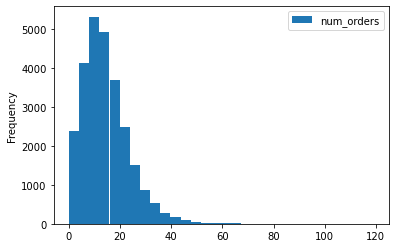

In [3]:
data.plot.hist(bins=30)

In [4]:
display('Duplicates:', data.duplicated().sum())
display('NAs:', data.isna().sum())

'Duplicates:'

26415

'NAs:'

num_orders    0
dtype: int64

In [5]:
display(data.index.max())
display(data.index.min())

Timestamp('2018-08-31 23:50:00')

Timestamp('2018-03-01 00:00:00')

**Conclusions**

To predict the number of taxi orders, data was loaded containing information on the number of orders for 6 months. No duplicates or omissions found.

### One hour resampling

<AxesSubplot:xlabel='datetime'>

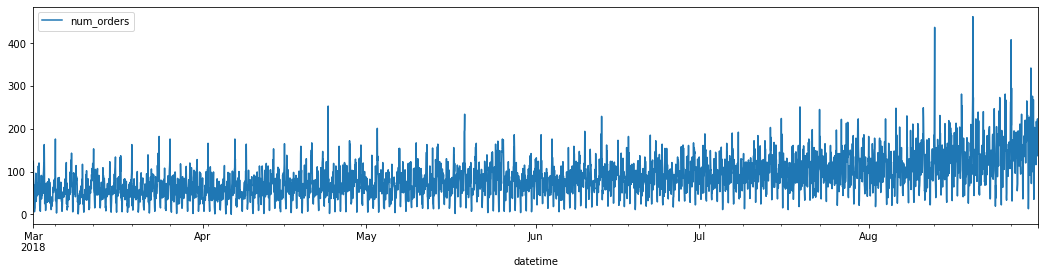

In [6]:
# Calculate number of orders in an hour
data = data.resample('1H').sum()
data.plot(figsize=(18, 4))

<AxesSubplot:xlabel='datetime'>

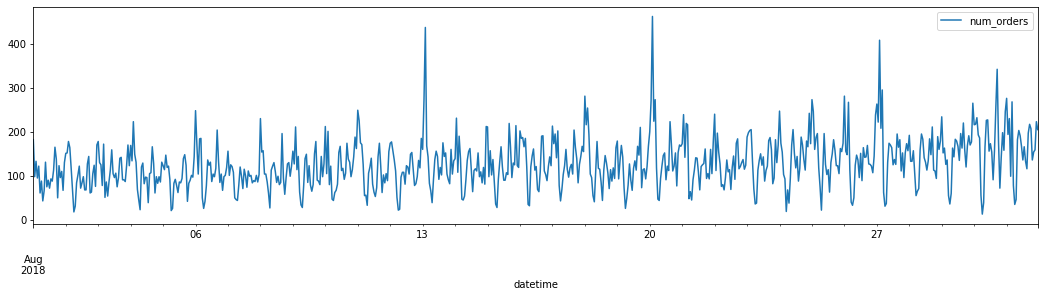

In [7]:
# Look closer at one month (for example, august)
data_aug = data['2018-08-01':'2018-08-31']
data_aug.plot(figsize=(18, 4))

<AxesSubplot:xlabel='datetime'>

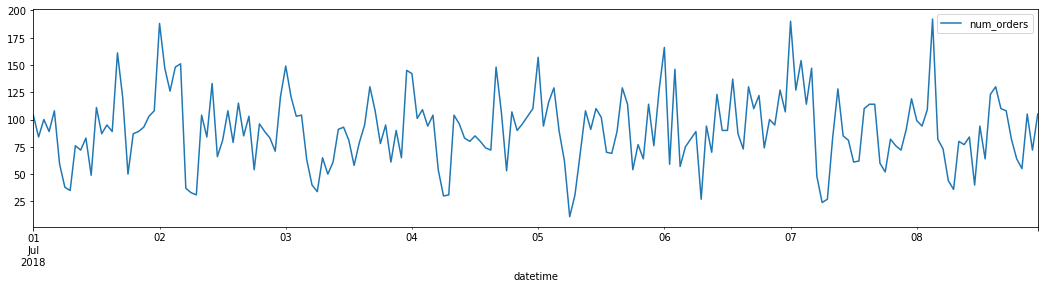

In [8]:
# Look closer at one week
data_week= data['2018-07-01':'2018-07-08']
data_week.plot(figsize=(18, 4))

**Conclusion**

One can see on the figures that there are repeating patterns of orders quantity: high peaks every 7 days (on one moths figure), and peaks in the begining of each day

## Analysis

### Rolling mean

<AxesSubplot:xlabel='datetime'>

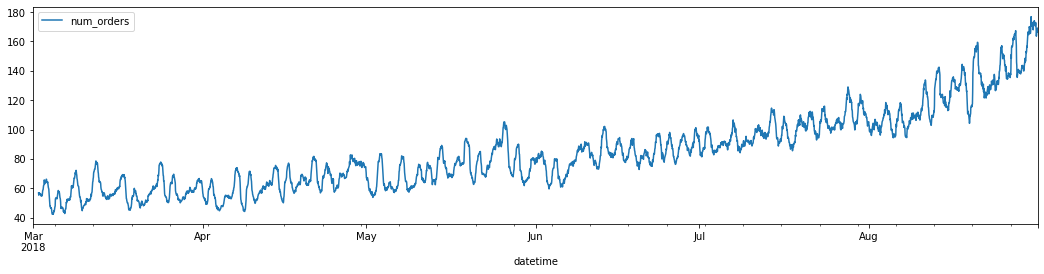

In [9]:
# Rolling mean for days
data.rolling(24).mean().plot(figsize=(18, 4))

**Conclusion**

The figure below shows that the number of orders is growing over time, also we can see fluctuations, that may be noise or may be a reflection of seasonality.

### Trends and Seasonality

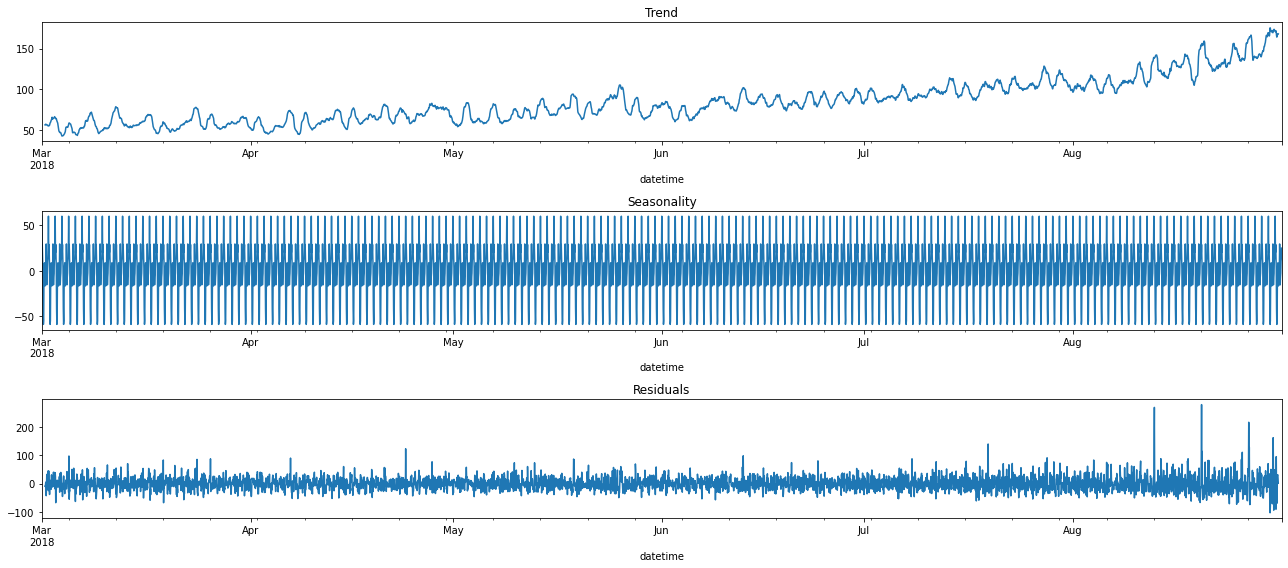

In [10]:
# Decompose the whole period of time
decomposed = seasonal_decompose(data) 

plt.figure(figsize=(18, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

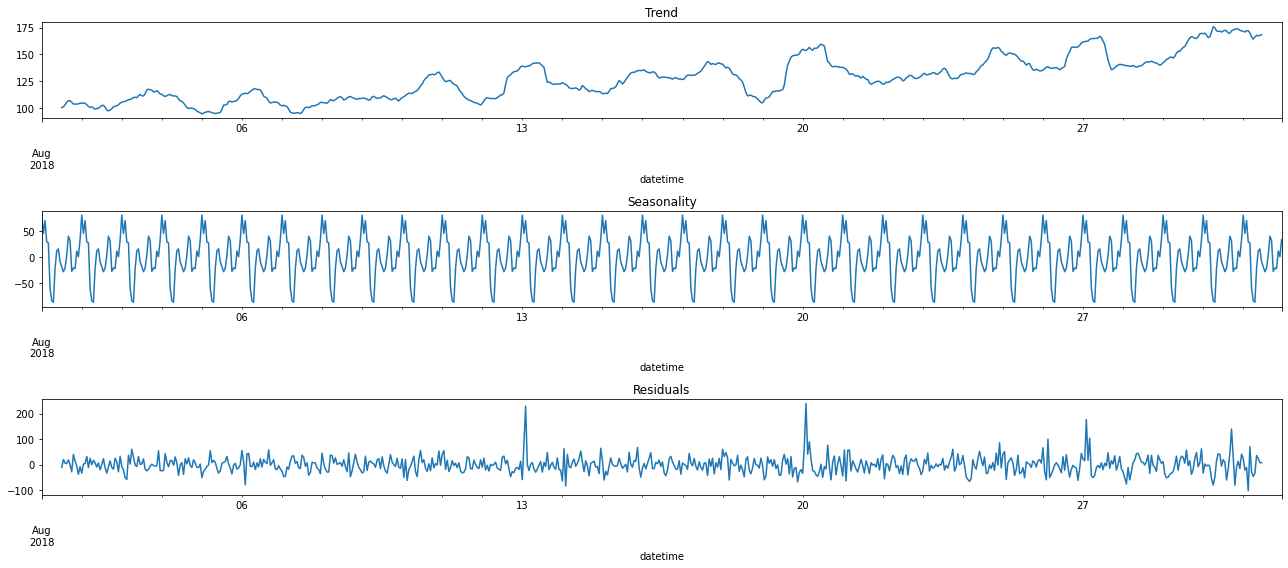

In [11]:
# Decompose one month
decomposed_month = seasonal_decompose(data_aug) 

plt.figure(figsize=(18, 8))
plt.subplot(311)

decomposed_month.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_month.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed_month.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

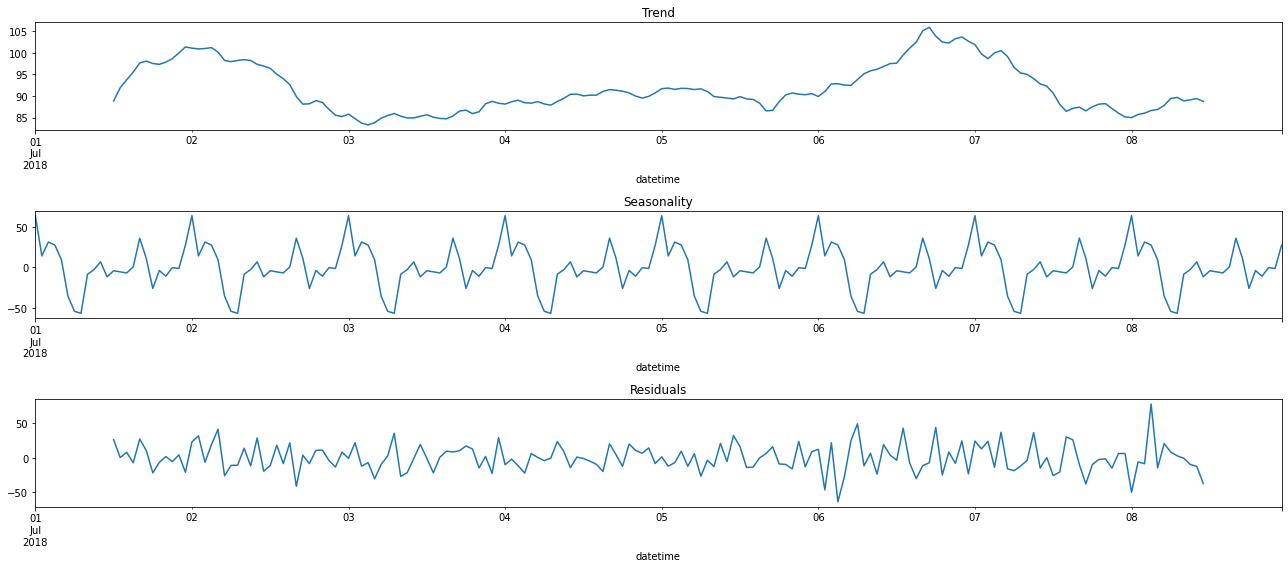

In [12]:
# Decompose one week
decomposed_week = seasonal_decompose(data_week) 

plt.figure(figsize=(18, 8))
plt.subplot(311)

decomposed_week.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_week.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed_week.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

**Conclusion** 

Trends and seasonality was studied. On the graphs presented, you can see that the number of orders is growing over time, there are also "seasonal" weekly and intraday fluctuations.

###  Time Series Differences

<AxesSubplot:xlabel='datetime'>

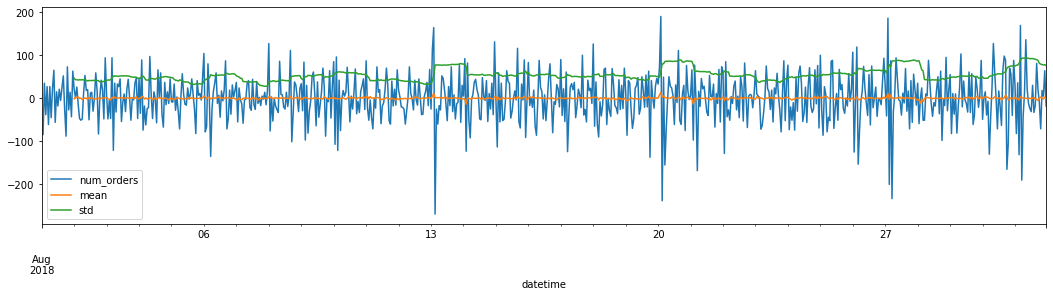

In [13]:
data_dif = data_aug - data_aug.shift()
data_dif['mean'] = data_dif['num_orders'].rolling(24).mean()
data_dif['std'] = data_dif['num_orders'].rolling(24).std()
data_dif.plot(figsize=(18, 4))

## Machine Learning

### Features Creation

In [14]:
# Function for features creation
def make_features(data, max_lag, rolling_mean_size):
    data_features = data.copy()
    data_features['day'] = data.index.day
    data_features['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data_features['lag_{}'.format(lag)] = data_features['num_orders'].shift(lag)

    data_features['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data_features

In [15]:
df = make_features(data, 7*24, 1) #features with a week shift
display(df.head())

,num_orders,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
2018-03-01 02:00:00,71,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0
2018-03-01 03:00:00,66,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0
2018-03-01 04:00:00,43,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0


In [16]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()


features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [17]:
display(features_train.shape)
display(features_test.shape)

(3806, 171)

(442, 171)

### Linear Regression Model

In [18]:
# Find best max_lag value
rmse_train = []
rmse_test = []

for i in range(1, 30):
    df = make_features(data, i*24, 2)
    train, test = train_test_split(df, shuffle=False, test_size=0.1)
    train = train.dropna()


    features_train = train.drop(['num_orders'], axis=1)
    target_train = train['num_orders']

    features_test = test.drop(['num_orders'], axis=1)
    target_test = test['num_orders']
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    pred_train = model.predict(features_train)
    pred_test = model.predict(features_test)
    
    rmse_train.append(mean_squared_error(target_train, pred_train)**0.5)
    rmse_test.append(mean_squared_error(target_test, pred_test)**0.5)

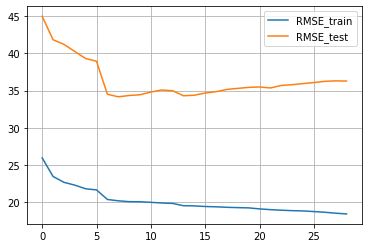

In [19]:
plt.plot(rmse_train, label='RMSE_train',)
plt.plot(rmse_test, label='RMSE_test')
plt.legend()
plt.grid()

In [20]:
display('Best max_lag value = 24 *', pd.Series(rmse_test).idxmin())

'Best max_lag value = 24 *'

7

**Conclusion**

As the value of max_lag increases, the RMSE on the training data decreases monotonically, while the RMSE on the test set has a minimum at max_lag 7*24 = 192

### Random Forest Model

In [21]:
# Function for new features for RF model
df = make_features(data, 24, 1).dropna()
from sklearn.model_selection import TimeSeriesSplit

x = df.drop(['num_orders'], axis=1)
y = df['num_orders']

tscv = TimeSeriesSplit(
    n_splits=5,
    max_train_size=5000,
)

In [22]:
# GridSearchCv for best hyperparmeters search
estimator = RandomForestRegressor(random_state = 42)

param_grid =  {
    'n_estimators': list(np.arange(10, 100, 10).astype(int)),
    'max_depth': list(np.arange(1, 12, 2).astype(int)),
}
# Обучение
model_rf = GridSearchCV(estimator=estimator, cv=tscv,
                        param_grid=param_grid)
model_rf.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=5000, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]})

In [23]:
display(model_rf.best_score_)
display(model_rf.best_params_)

0.45175401694099904

{'max_depth': 11, 'n_estimators': 80}

### Prediction by previous value

In [24]:
# Prediction by a week-old value
pred_previous = test['num_orders'].shift(24*7, fill_value=target_train.iloc[len(target_train)-1])
display("RMSE by a week-old value prediction:", mean_squared_error(pred_previous, target_test)**0.5)

'RMSE by a week-old value prediction:'

48.531838688801365

<AxesSubplot:>

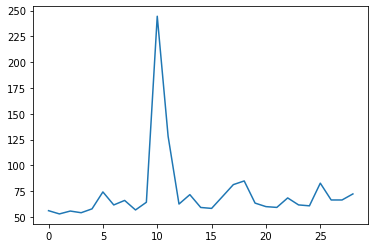

In [25]:
#Search for better gap than 7 days
rmse = []
for i in range(1,30):
    last_value = target_train.iloc[len(target_train)-i-1] #находим первое значение для предсказаний в хвосте обучающей выборки
    pred_previous = test['num_orders'].shift(24*i, fill_value=last_value)
    rmse.append( mean_squared_error(pred_previous, target_test)**0.5)
rmse = pd.Series(data = rmse)
rmse.plot()

In [31]:
print("Best RMSE:", rmse.min(), 'using ', rmse.idxmin(), ' day(s) shift')

Best RMSE: 53.003329529157604 using  1  day(s) shift


**Conclusions**

The best results were obtained using Linear Regression Model.

## Test

In [27]:
# Random Forest Model Test
model_rf = RandomForestRegressor(max_depth = 11, 
                                 n_estimators = 80, 
                                 random_state = 42)
model_rf.fit(features_train, target_train)

preds = model_rf.predict(features_test)
rmse_forest = mean_squared_error(preds, target_test) ** 0.5

In [28]:
display('RMSE on test set on RandomForest:', rmse_forest)

'RMSE on test set on RandomForest:'

37.68348175590732

In [29]:
# Linear Regression model test
df = make_features(data, 8*24, 2)
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

model = LinearRegression()
model.fit(features_train, target_train)
pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

In [30]:
display("RMSE on test set on LinearRegression:", mean_squared_error(target_test, pred_test)**0.5)

'RMSE on test set on LinearRegression:'

34.15510403487076

**Conclusion**

To solve the problem of predicting the number of taxi orders, we were provided with data on 26.5 thousand 10-minute intervals with the number of orders for 6 months. The data did not require pre-processing, did not contain duplicates, gaps and outliers.

We have trained three models with different parameters: random forest, linear regression and previous value prediction.

According to the customer's requirements, the required RMSE value was obtained using the prediction of a linear regression model.